<a id='top'></a>

# Second Spectrum Data Engineering
##### Notebook to engineer [Second Spectrum](https://www.secondspectrum.com/index.html) Tracking data using [pandas](http://pandas.pydata.org/).

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 20/01/2022<br>
Notebook last updated: 26/01/2022

![Watford F.C.](../../img/logos/second_spectrum_logo.jpeg)

![Second Spectrum](../../img/club_badges/premier_league/watford_fc_logo_small.png)

Click [here](#section4) to jump straight into the Data Engineering section and skip the [Notebook Brief](#section2) and [Data Sources](#section3) sections.

___


## <a id='introduction'>Introduction</a>
This notebook parses a provided sample of [Second Spectrum](https://www.secondspectrum.com/index.html) Tracking data using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

For more information about this notebook and the author, I am available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/); and
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster).

A static version of this notebook can be found [here](https://nbviewer.org/github/eddwebster/statsbomb/blob/main/notebooks/StatsBomb%20Data%20Engineering.ipynb). This notebook has an accompanying [`watford`](https://github.com/eddwebster/watford) GitHub repository and for my full repository of football analysis, see my [`football_analysis`](https://github.com/eddwebster/football_analytics) GitHub repository.

___

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Notebook Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Read in the Datasets](#section3.2)<br>
      3.    [Join the Datasets](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
4.    [Data Engineering](#section4)<br>
      1.    [Assign Raw DataFrame to Engineered DataFrame](#section4.1)<br>
      2.    [Rename Columns](#section4.2)<br>
      3.    [Drop Duplicate Columns](#section4.3)<br>
      4.    [Sort the DataFrame](#section4.4)<br>
      3.    [Determine Each Player's Most Frequent Position](#section4.3)<br>
      6.    [Determine Each Player's Total Minutes Played](#section4.6)<br>
      7.    [Break Down All location Attributes](#section4.7)<br>
5.    [Summary](#section5)<br>
6.    [Next Steps](#section6)<br>
7.    [References](#section7)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing; and
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation.

All packages used for this notebook can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
import math
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import pandas_profiling as pp
import os
import re
import chardet
import random
from io import BytesIO
from pathlib import Path

# Kloppy
from kloppy import secondspectrum

# Reading Directories
import glob
import os

# Working with JSON
import json
from pandas import json_normalize

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import patches
import seaborn as sns
import missingno as msno
import moviepy.editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage

# Requests and downloads
import tqdm
import requests

# Machine Learning
import scipy.signal as signal
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Print message
print('Setup Complete')

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))

Python: 3.7.6
NumPy: 1.19.1
pandas: 1.1.3
matplotlib: 3.3.1


### Defined Filepaths

In [3]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..')
data_dir = os.path.join(base_dir, 'data')
data_dir_second_spectrum = os.path.join(base_dir, 'data', 'second_spectrum')
data_dir_opta = os.path.join(base_dir, 'data', 'opta')
scripts_dir = os.path.join(base_dir, 'scripts')
scripts_dir_second_spectrum = os.path.join(base_dir, 'scripts', 'second_spectrum')
scripts_dir_metrica_sports = os.path.join(base_dir, 'scripts', 'metrica_sports')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
fig_dir_second_spectrum = os.path.join(base_dir, 'img', 'fig', 'second_spectrum')
video_dir = os.path.join(base_dir, 'video')
video_dir_second_spectrum = os.path.join(base_dir, 'video', 'fig', 'second_spectrum')

### Custom Libraries for Tracking Data
Custom libraries for working with Metrica Sports and Signality data Tracking data, that work for this task once the data is formatted the same [[link](https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking)]. This include creating Pitch Control models without Tracking data.

In [4]:
# Custom libraries for working with Tracking data

## Define path of scripts
sys.path.insert(0, os.path.abspath(scripts_dir_second_spectrum))

## Signality scripts - custom scripts derived from Laurie Shaw's Metrica scripts
import Signality_IO as sio
import Signality_Viz as sviz
import Signality_Velocities as svel
import Signality_PitchControl as spc
import Signality_EPV as sepv

## Laurie Shaw's custom libraries for working with Metrica Sports data
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel
import Metrica_PitchControl as mpc
import Metrica_EPV as mepv

### Custom Functions

In [5]:
# Define function to to read in Tracking data using Kloppy
def read_in_tracking_data(filename):
    
    """
    Function to read in Second Spectrum Tracking data as a pandas DataFrame using Kloppy. Written by Edd Webster / @eddwebster
    """
    
    # Read in exported CSV file if exists, if not, read in the raw JSON and XML files using Kloppy

    ## If not already saved as a CSV file
    if not os.path.exists(os.path.join(data_dir_second_spectrum, 'raw', 'data', f'{filename}_SecondSpectrum_Data.csv')):

        ### Load meta data (XML) and raw data (JSONL) files
        dataset = secondspectrum.load(
        meta_data = f'../../data/second_spectrum/raw/metadata/{filename}_SecondSpectrum_Metadata.xml',
        raw_data = f'../../data/second_spectrum/raw/data/{filename}_SecondSpectrum_Data.jsonl',
       #meta_data = os.path.join(data_dir_second_spectrum, 'raw', 'data', f'{filename}_SecondSpectrum_Metadata.xml')
       #raw_data = os.path.join(data_dir_second_spectrum, 'raw', 'data', f'{filename}_SecondSpectrum_Data.jsonl')

        ### Optional arguments
        additional_meta_data = f'../../data/second_spectrum/raw/metadata/{filename}_SecondSpectrum_Metadata.json',
       #additional_meta_data = os.path.join(data_dir_second_spectrum, 'raw', 'data', f'{filename}_SecondSpectrum_Metadata.json')
       #sample_rate=1/25,
       #limit=100,
        coordinates='secondspectrum',
       #only_alive=True
        )

        ### Convert DataFrame to pandas
        df_tracking = dataset.to_pandas()

        ### Export raw DataFrame
        df_tracking.to_csv(os.path.join(data_dir_second_spectrum, 'raw', 'data', f'g{filename}_SecondSpectrum_Data.csv'), index=None, header=True)

    ## If already, read in CSV file
    else:
        df_tracking = pd.read_csv(os.path.join(data_dir_second_spectrum, 'raw', 'data', f'g{filename}_SecondSpectrum_Data.csv'))   
    
    
    ## Return DataFrame
    return df_tracking

### Notebook Settings

In [6]:
# Display all columns of displayed pandas DataFrames
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

---

<a id='section2'></a>

## <a id='#section2'>2. Notebook Brief</a>
This notebook parses and engineers [Second Spectrum](https://www.secondspectrum.com/index.html) using [pandas](http://pandas.pydata.org/) and [`kloppy`](https://kloppy.pysport.org/), for two Premier League matches featuring Crystal Palace during the 21/22 season. The two datasets provided are for the following matches:
*   [27/09/2021: Crystal Palace (1) vs. (1) Brighton & Hove Albion](https://www.bbc.co.uk/sport/football/58620544) (g2210324)
*   [03/10/2021: Crystal Palace (2) vs. (2) Leicester City](https://www.bbc.co.uk/sport/football/58667896) (g2210334)

Once engineered, this dataset will be visualised and analysed in congunction with the corresponding Event data, as part of an opposition analysis piece.


**Notebook Conventions**:<br>
*    Variables that refer a `DataFrame` object are prefixed with `df_`.
*    Variables that refer to a collection of `DataFrame` objects (e.g., a list, a set or a dict) are prefixed with `dfs_`.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

<a id='section3.1'></a>

### <a id='#section3.1'>3.1. Introduction</a>
[Second Spectrum](https://www.secondspectrum.com/index.html) are a  football analytics, data provider ... 

![Second Spectrum](../../img/logos/second_spectrum_logo.jpeg)

<a id='section3.2'></a>

### <a id='#section3.2'>3.2. Import Data</a>
The following cells ... and read it as [pandas](https://pandas.pydata.org/) DataFrames.

This dataset has been made available as `JSON` and `XML` files, I have elected to work with the `JSON` files.

In [7]:
# Show files in directory
print(glob.glob(os.path.join(data_dir_second_spectrum, 'raw', 'data/*.csv')))

['../../data/second_spectrum/raw/data/g2210334_SecondSpectrum_Data.csv', '../../data/second_spectrum/raw/data/g2210324_SecondSpectrum_Data.csv']


In [8]:
# Read in Tracking data using the 'read_in_tracking_data' function, powered by Kloppy
df_tracking_cry_bri = read_in_tracking_data(filename='2210324')
df_tracking_cry_lei = read_in_tracking_data(filename='2210334')

<a id='section3.3'></a>

### <a id='#section3.3'>3.3. Initial Data Handling</a>
To avoid duplication commands and to get an idea of what the output of the Tracking data looks like, this section just goes through the first of the two Event files, [Crystal Palace vs. Leicester City](https://www.bbc.co.uk/sport/football/58620544) (g2210334).

First check the quality of the dataset by looking first and last rows in pandas using the [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [`tail()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [13]:
# Display the first five rows of the DataFrame, df_tracking_cry_lei
df_tracking_cry_lei.head()

,period_id,timestamp,ball_state,ball_owning_team_id,ball_x,ball_y,66975_x,66975_y,66975_d,66975_s,55494_x,55494_y,55494_d,55494_s,80146_x,80146_y,80146_d,80146_s,40836_x,40836_y,40836_d,40836_s,50471_x,50471_y,50471_d,50471_s,199670_x,199670_y,199670_d,199670_s,244723_x,244723_y,244723_d,244723_s,82403_x,82403_y,82403_d,82403_s,209036_x,209036_y,209036_d,209036_s,232787_x,232787_y,232787_d,232787_s,174874_x,174874_y,174874_d,174874_s,101668_x,101668_y,101668_d,101668_s,17745_x,17745_y,17745_d,17745_s,197469_x,197469_y,197469_d,197469_s,218031_x,218031_y,218031_d,218031_s,40146_x,40146_y,40146_d,40146_s,173515_x,173515_y,173515_d,173515_s,201666_x,201666_y,201666_d,201666_s,93100_x,93100_y,93100_d,93100_s,166989_x,166989_y,166989_d,166989_s,219352_x,219352_y,219352_d,219352_s,166477_x,166477_y,166477_d,166477_s,443661_x,443661_y,443661_d,443661_s,225902_x,225902_y,225902_d,225902_s,172780_x,172780_y,172780_d,172780_s,86417_x,86417_y,86417_d,86417_s,51938_x,51938_y,51938_d,51938_s,54861_x,54861_y,54861_d,54861_s
0,1,0.00,dead,31,0.04,0.09,0.60,-9.08,NaN,NaN,11.43,10.22,NaN,NaN,0.21,9.47,NaN,NaN,42.10,-0.19,NaN,NaN,-0.36,0.35,NaN,NaN,-0.57,-20.55,NaN,NaN,7.63,-25.09,NaN,NaN,1.22,-30.53,NaN,NaN,14.71,-12.51,NaN,NaN,0.51,2.82,NaN,NaN,19.24,0.54,NaN,NaN,-0.93,9.31,NaN,NaN,-50.43,0.12,NaN,NaN,-10.17,-19.71,NaN,NaN,-16.67,-16.05,NaN,NaN,-13.94,9.96,NaN,NaN,0.49,-10.92,NaN,NaN,-3.18,10.89,NaN,NaN,-15.10,-0.99,NaN,NaN,-8.98,0.43,NaN,NaN,-0.99,-20.88,NaN,NaN,-14.75,-27.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.04,alive,31,0.83,0.09,0.56,-9.07,NaN,NaN,11.41,10.22,NaN,NaN,0.22,9.47,NaN,NaN,42.11,-0.19,NaN,NaN,-0.35,0.35,NaN,NaN,-0.64,-20.47,NaN,NaN,7.62,-25.09,NaN,NaN,1.24,-30.53,NaN,NaN,14.70,-12.52,NaN,NaN,0.50,2.81,NaN,NaN,19.23,0.54,NaN,NaN,-0.89,9.25,NaN,NaN,-50.42,0.12,NaN,NaN,-10.13,-19.70,NaN,NaN,-16.68,-16.06,NaN,NaN,-13.94,9.96,NaN,NaN,0.59,-10.86,NaN,NaN,-3.19,10.91,NaN,NaN,-15.13,-0.99,NaN,NaN,-8.95,0.44,NaN,NaN,-0.99,-20.83,NaN,NaN,-14.75,-27.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,alive,31,1.34,0.09,0.53,-9.07,NaN,NaN,11.41,10.21,NaN,NaN,0.22,9.46,NaN,NaN,42.11,-0.19,NaN,NaN,-0.34,0.34,NaN,NaN,-0.71,-20.40,NaN,NaN,7.62,-25.08,NaN,NaN,1.25,-30.53,NaN,NaN,14.70,-12.53,NaN,NaN,0.49,2.80,NaN,NaN,19.23,0.54,NaN,NaN,-0.84,9.19,NaN,NaN,-50.43,0.13,NaN,NaN,-10.09,-19.69,NaN,NaN,-16.69,-16.07,NaN,NaN,-13.93,9.99,NaN,NaN,0.70,-10.80,NaN,NaN,-3.20,10.94,NaN,NaN,-15.16,-0.99,NaN,NaN,-8.92,0.44,NaN,NaN,-1.00,-20.78,NaN,NaN,-14.76,-27.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,alive,31,2.03,0.10,0.50,-9.06,NaN,NaN,11.39,10.21,NaN,NaN,0.23,9.45,NaN,NaN,42.11,-0.19,NaN,NaN,-0.35,0.34,NaN,NaN,-0.79,-20.31,NaN,NaN,7.60,-25.08,NaN,NaN,1.26,-30.53,NaN,NaN,14.69,-12.54,NaN,NaN,0.47,2.78,NaN,NaN,19.23,0.54,NaN,NaN,-0.77,9.12,NaN,NaN,-50.42,0.13,NaN,NaN,-10.05,-19.67,NaN,NaN,-16.69,-16.09,NaN,NaN,-13.92,10.02,NaN,NaN,0.80,-10.75,NaN,NaN,-3.22,10.96,NaN,NaN,-15.16,-1.00,NaN,NaN,-8.88,0.44,NaN,NaN,-1.02,-20.73,NaN,NaN,-14.76,-27.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,alive,31,2.85,0.11,0.46,-9.06,NaN,NaN,11.40,10.19,NaN,NaN,0.25,9.43,NaN,NaN,42.11,-0.19,NaN,NaN,-0.36,0.33,NaN,NaN,-0.88,-20.23,NaN,NaN,7.59,-25.07,NaN,NaN,1.27,-30.53,NaN,NaN,14.68,-12.56,NaN,NaN,0.46,2.77,NaN,NaN,19.23,0.54,NaN,NaN,-0.70,9.04,NaN,NaN,-50.42,0.13,NaN,NaN,-10.02,-19.65,NaN,NaN,-16.70,-16.09,NaN,NaN,-13.93,10.04,NaN,NaN,0.91,-10.69,NaN,NaN,-3.22,11.00,NaN,NaN,-15.20,-1.01,NaN,NaN,-8.91,0.45,NaN,NaN,-1.04,-20.69,NaN,NaN,-14.78,-27.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Display the last five rows of the DataFrame, df_tracking_cry_lei
df_tracking_cry_lei.tail()

,period_id,timestamp,ball_state,ball_owning_team_id,ball_x,ball_y,66975_x,66975_y,66975_d,66975_s,55494_x,55494_y,55494_d,55494_s,80146_x,80146_y,80146_d,80146_s,40836_x,40836_y,40836_d,40836_s,50471_x,50471_y,50471_d,50471_s,199670_x,199670_y,199670_d,199670_s,244723_x,244723_y,244723_d,244723_s,82403_x,82403_y,82403_d,82403_s,209036_x,209036_y,209036_d,209036_s,232787_x,232787_y,232787_d,232787_s,174874_x,174874_y,174874_d,174874_s,101668_x,101668_y,101668_d,101668_s,17745_x,17745_y,17745_d,17745_s,197469_x,197469_y,197469_d,197469_s,218031_x,218031_y,218031_d,218031_s,40146_x,40146_y,40146_d,40146_s,173515_x,173515_y,173515_d,173515_s,201666_x,201666_y,201666_d,201666_s,93100_x,93100_y,93100_d,93100_s,166989_x,166989_y,166989_d,166989_s,219352_x,219352_y,219352_d,219352_s,166477_x,166477_y,166477_d,166477_s,443661_x,443661_y,443661_d,443661_s,225902_x,225902_y,225902_d,225902_s,172780_x,172780_y,172780_d,172780_s,86417_x,86417_y,86417_d,86417_s,51938_x,51938_y,51938_d,51938_s,54861_x,54861_y,54861_d,54861_s
145616,2,3003.92,dead,31,0.0,0.0,-3.75,-18.83,NaN,NaN,-3.06,-30.92,NaN,NaN,NaN,NaN,NaN,NaN,-37.09,-5.20,NaN,NaN,-3.05,-3.99,NaN,NaN,NaN,NaN,NaN,NaN,-1.01,8.49,NaN,NaN,6.16,13.24,NaN,NaN,-13.54,-3.99,NaN,NaN,NaN,NaN,NaN,NaN,-19.02,-27.61,NaN,NaN,-2.28,-26.67,NaN,NaN,41.40,-1.46,NaN,NaN,NaN,NaN,NaN,NaN,19.16,-4.38,NaN,NaN,17.66,-23.71,NaN,NaN,NaN,NaN,NaN,NaN,-1.41,-22.07,NaN,NaN,20.40,-14.86,NaN,NaN,7.23,-20.32,NaN,NaN,NaN,NaN,NaN,NaN,16.14,6.60,NaN,NaN,3.14,-31.79,NaN,NaN,9.04,-6.38,NaN,NaN,-2.69,-16.54,NaN,NaN,14.74,-21.58,NaN,NaN,6.37,4.74,NaN,NaN,20.38,-2.36,NaN,NaN
145617,2,3003.96,dead,31,0.0,0.0,-3.76,-18.77,NaN,NaN,-3.07,-30.87,NaN,NaN,NaN,NaN,NaN,NaN,-37.07,-5.24,NaN,NaN,-3.05,-3.97,NaN,NaN,NaN,NaN,NaN,NaN,-0.98,8.54,NaN,NaN,6.20,13.26,NaN,NaN,-13.55,-3.97,NaN,NaN,NaN,NaN,NaN,NaN,-19.02,-27.58,NaN,NaN,-2.31,-26.62,NaN,NaN,41.38,-1.46,NaN,NaN,NaN,NaN,NaN,NaN,19.14,-4.34,NaN,NaN,17.68,-23.67,NaN,NaN,NaN,NaN,NaN,NaN,-1.36,-22.05,NaN,NaN,20.38,-14.81,NaN,NaN,7.22,-20.26,NaN,NaN,NaN,NaN,NaN,NaN,16.17,6.64,NaN,NaN,3.25,-31.75,NaN,NaN,9.04,-6.34,NaN,NaN,-2.69,-16.50,NaN,NaN,14.74,-21.55,NaN,NaN,6.40,4.78,NaN,NaN,20.36,-2.30,NaN,NaN
145618,2,3004.00,dead,31,0.0,0.0,-3.78,-18.73,NaN,NaN,-3.09,-30.82,NaN,NaN,NaN,NaN,NaN,NaN,-37.04,-5.27,NaN,NaN,-3.04,-3.95,NaN,NaN,NaN,NaN,NaN,NaN,-0.95,8.58,NaN,NaN,6.23,13.29,NaN,NaN,-13.56,-3.95,NaN,NaN,NaN,NaN,NaN,NaN,-19.00,-27.55,NaN,NaN,-2.34,-26.58,NaN,NaN,41.37,-1.45,NaN,NaN,NaN,NaN,NaN,NaN,19.12,-4.30,NaN,NaN,17.70,-23.64,NaN,NaN,NaN,NaN,NaN,NaN,-1.32,-22.02,NaN,NaN,20.36,-14.77,NaN,NaN,7.22,-20.21,NaN,NaN,NaN,NaN,NaN,NaN,16.19,6.68,NaN,NaN,3.35,-31.71,NaN,NaN,9.04,-6.29,NaN,NaN,-2.69,-16.45,NaN,NaN,14.75,-21.53,NaN,NaN,6.42,4.82,NaN,NaN,20.34,-2.24,NaN,NaN
145619,2,3004.04,dead,31,0.0,0.0,-3.80,-18.67,NaN,NaN,-3.10,-30.77,NaN,NaN,NaN,NaN,NaN,NaN,-37.01,-5.31,NaN,NaN,-3.04,-3.92,NaN,NaN,NaN,NaN,NaN,NaN,-0.92,8.63,NaN,NaN,6.26,13.32,NaN,NaN,-13.57,-3.92,NaN,NaN,NaN,NaN,NaN,NaN,-18.99,-27.51,NaN,NaN,-2.36,-26.54,NaN,NaN,41.35,-1.44,NaN,NaN,NaN,NaN,NaN,NaN,19.09,-4.25,NaN,NaN,17.72,-23.60,NaN,NaN,NaN,NaN,NaN,NaN,-1.27,-21.99,NaN,NaN,20.33,-14.72,NaN,NaN,7.21,-20.15,NaN,NaN,NaN,NaN,NaN,NaN,16.21,6.72,NaN,NaN,3.45,-31.67,NaN,NaN,9.03,-6.25,NaN,NaN,-2.68,-16.41,NaN,NaN,14.75,-21.50,NaN,NaN,6.45,4.86,NaN,NaN,20.31,-2.18,NaN,NaN
145620,2,3004.08,dead,31,0.0,0.0,-3.81,-18.62,NaN,NaN,-3.12,-30.72,NaN,NaN,NaN,NaN,NaN,NaN,-36.98,-5.34,NaN,NaN,-3.04,-3.90,NaN,NaN,NaN,NaN,NaN,NaN,-0.90,8.68,NaN,NaN,6.29,13.34,NaN,NaN,-13.58,-3.90,NaN,NaN,NaN,NaN,NaN,NaN,-18.98,-27.48,NaN,NaN,-2.38,-26.50,NaN,NaN,41.34,-1.43,NaN,NaN,NaN,NaN,NaN,NaN,19.07,-4.20,NaN,NaN,17.74,-23.56,NaN,NaN,NaN,NaN,NaN,NaN,-1.23,-21.97,NaN,NaN,20.31,-14.68,NaN,NaN,7.20,-20.10,NaN,NaN,NaN,NaN,NaN,NaN,16.23,6.76,NaN,NaN,3.54,-31.63,NaN,NaN,9.03,-6.20,NaN,NaN,-2.68,-16.36,NaN,NaN,14.76,-21.48,NaN,NaN,6.48,4.90,NaN,NaN,20.29,-2.13,NaN,NaN


In [15]:
# Print the shape of the DataFrame, df_tracking_cry_lei
print(df_tracking_cry_lei.shape)

(145621, 118)


In [16]:
# Print the column names of the DataFrame, df_tracking_cry_lei
print(df_tracking_cry_lei.columns)

Index(['period_id', 'timestamp', 'ball_state', 'ball_owning_team_id', 'ball_x',
       'ball_y', '66975_x', '66975_y', '66975_d', '66975_s',
       ...
       '86417_d', '86417_s', '51938_x', '51938_y', '51938_d', '51938_s',
       '54861_x', '54861_y', '54861_d', '54861_s'],
      dtype='object', length=118)


In [17]:
# Data types of the features of the raw DataFrame, df_tracking_cry_lei
df_tracking_cry_lei.dtypes

period_id                int64
timestamp              float64
ball_state              object
ball_owning_team_id      int64
ball_x                 float64
                        ...   
51938_s                float64
54861_x                float64
54861_y                float64
54861_d                float64
54861_s                float64
Length: 118, dtype: object

Full details of these attributes and their data types is discussed further in the [Data Dictionary](section3.2.2).

In [18]:
# Displays all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_tracking_cry_lei.dtypes)

period_id                int64
timestamp              float64
ball_state              object
ball_owning_team_id      int64
ball_x                 float64
ball_y                 float64
66975_x                float64
66975_y                float64
66975_d                float64
66975_s                float64
55494_x                float64
55494_y                float64
55494_d                float64
55494_s                float64
80146_x                float64
80146_y                float64
80146_d                float64
80146_s                float64
40836_x                float64
40836_y                float64
40836_d                float64
40836_s                float64
50471_x                float64
50471_y                float64
50471_d                float64
50471_s                float64
199670_x               float64
199670_y               float64
199670_d               float64
199670_s               float64
244723_x               float64
244723_y               float64
244723_d

In [19]:
# Info for the raw DataFrame, df_tracking_cry_lei
df_tracking_cry_lei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145621 entries, 0 to 145620
Columns: 118 entries, period_id to 54861_s
dtypes: float64(115), int64(2), object(1)
memory usage: 131.1+ MB


<AxesSubplot:>

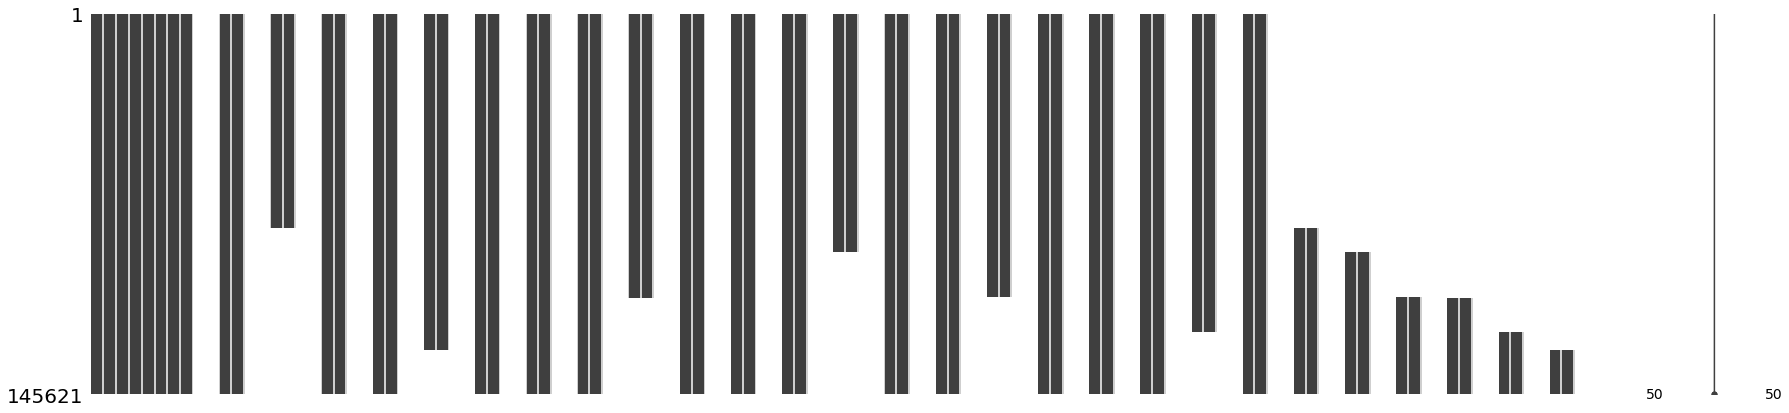

In [20]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tracking_cry_lei
msno.matrix(df_tracking_cry_lei, figsize = (30, 7))

In [21]:
# Counts of missing values
null_value_stats = df_tracking_cry_lei.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

66975_d    145621
66975_s    145621
55494_d    145621
55494_s    145621
80146_x     63487
            ...  
51938_s    145621
54861_x    128694
54861_y    128694
54861_d    145621
54861_s    145621
Length: 80, dtype: int64

---

<a id='section4'></a>

## <a id='#section4'>4. Data Engineering</a>
The next step is to wrangle the dataset to into a format that’s suitable for analysis.

This section is broken down into the following subsections:

4.1.    [Reset Index](#section4.1)<br>
4.2.    [Rename Columns](#section4.2)<br>
4.3.    [Rename Player Columns Using Metadata](#section4.3)<br>
4.4.    [Separate Home and Away DataFrames](#section44)<br>
4.5.    [Calculate Player Velocities](#section4.5)<br>
4.6.    [Reverse direction of players](#section4.6)<br>

<a id='section4.1'></a>

### <a id='#section4.1'>4.1. Reset Index</a>
Reset index, the existing index will not be dropped and will be used to identify the frame number.

In [22]:
# Reset index, the existing index will be used for the frame number
df_tracking_cry_lei = df_tracking_cry_lei.reset_index(drop=False)

<a id='section4.2'></a>

### <a id='#section4.2'>4.2. Rename Columns</a>
To work with [Laurie Shaw](https://twitter.com/EightyFivePoint)'s Metrica Sports Tracking data libraries, [`LaurieOnTracking`](https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking), the data needs to be engineered to match the Metrica schema, which is the following:

| Feature         | Data type     | Definition     |
|-----------------|---------------|----------------|
| `Frame`         | object        |                |
| `Period`        | object        |                |
| `Time [s]`      | object        |                |
| `Home_11_x`     | object        |                |	
| `Home_11_y`     | object        |                |
| `Away_8_x`      | object        |	               |
| `Away_8_y`      | object        |                |

For a full list of definitions, see the Metrica Sports documentation [[link](https://github.com/metrica-sports/sample-data/blob/master/documentation/events-definitions.pdf).

In [23]:
# Rename columns
df_tracking_cry_lei = df_tracking_cry_lei.rename(columns={'period_id': 'Period',
                                                          'timestamp': 'Time [s]',
                                                          'ball_state': 'Ball State',
                                                          'ball_owning_team_id': 'Ball Owning Team ID',
                                                          'index': 'Frame'
                                                         }
                                                )

<a id='section4.3'></a>

### <a id='#section4.3'>4.3. Rename Player Columns Using Metadata</a>
For compatibility with [Laurie Shaw](https://twitter.com/EightyFivePoint)'s Metrica Sports Tracking data library [`LaurieOnTracking`](https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking).

##### a) 

In [25]:
file_name = 'g2210334'

df_meta_cry_lei = pd.read_csv(os.path.join(data_dir_second_spectrum, 'raw', 'metadata', f'{file_name}_SecondSpectrum_Metadata_Players.csv'))

In [26]:
## Prepare DataFrame to create dictionary

### Convert data types
df_meta_cry_lei['optaId'] = df_meta_cry_lei['optaId'].astype(int)
df_meta_cry_lei['name'] = df_meta_cry_lei['name'].astype(str)

## Create a dictionary of Qualifier IDs and Qualifier Names from the reference dataset
dict_home_away_players = dict(zip(df_meta_cry_lei['optaId'], df_meta_cry_lei['HA']))

In [27]:
# 
dict_home_away_players_cry_lei = {'86417_x': 'Home_86417_x',
                                  '54861_x': 'Home_54861_x',
                                  '105666_x': 'Home_105666_x',
                                  '66975_x': 'Home_66975_x',
                                  '108413_x': 'Home_108413_x',
                                  '443661_x': 'Home_443661_x',
                                  '244723_x': 'Home_244723_x',
                                  '80146_x': 'Home_80146_x',
                                  '209036_x': 'Home_209036_x',
                                  '40836_x': 'Home_40836_x',
                                  '50471_x': 'Home_50471_x',
                                  '174874_x': 'Home_174874_x',
                                  '55494_x': 'Home_55494_x',
                                  '55037_x': 'Home_55037_x',
                                  '49413_x': 'Home_49413_x',
                                  '232787_x': 'Home_232787_x',
                                  '82403_x': 'Home_82403_x',
                                  '199670_x': 'Home_199670_x',
                                  '58786_x': 'Home_58786_x',
                                  '57328_x': 'Home_57328_x',

                                  '86417_y': 'Home_86417_y',
                                  '54861_y': 'Home_54861_y',
                                  '105666_y': 'Home_105666_y',
                                  '66975_y': 'Home_66975_y',
                                  '108413_y': 'Home_108413_y',
                                  '443661_y': 'Home_443661_y',
                                  '244723_y': 'Home_244723_y',
                                  '80146_y': 'Home_80146_y',
                                  '209036_y': 'Home_209036_y',
                                  '40836_y': 'Home_40836_y',
                                  '50471_y': 'Home_50471_y',
                                  '174874_y': 'Home_174874_y',
                                  '55494_y': 'Home_55494_y',
                                  '55037_y': 'Home_55037_y',
                                  '49413_y': 'Home_49413_y',
                                  '232787_y': 'Home_232787_y',
                                  '82403_y': 'Home_82403_y',
                                  '199670_y': 'Home_199670_y',
                                  '58786_y': 'Home_58786_y',
                                  '57328_y': 'Home_57328_y',

                                  '86417_d': 'Home_86417_d',
                                  '54861_d': 'Home_54861_d',
                                  '105666_d': 'Home_105666_d',
                                  '66975_d': 'Home_66975_d',
                                  '108413_d': 'Home_108413_d',
                                  '443661_d': 'Home_443661_d',
                                  '244723_d': 'Home_244723_d',
                                  '80146_d': 'Home_80146_d',
                                  '209036_d': 'Home_209036_d',
                                  '40836_d': 'Home_40836_d',
                                  '50471_d': 'Home_50471_d',
                                  '174874_d': 'Home_174874_d',
                                  '55494_d': 'Home_55494_d',
                                  '55037_d': 'Home_55037_d',
                                  '49413_d': 'Home_49413_d',
                                  '232787_d': 'Home_232787_d',
                                  '82403_d': 'Home_82403_d',
                                  '199670_d': 'Home_199670_d',
                                  '58786_d': 'Home_58786_d',
                                  '57328_d': 'Home_57328_d',

                                  '86417_s': 'Home_86417_s',
                                  '54861_s': 'Home_54861_s',
                                  '105666_s': 'Home_105666_s',
                                  '66975_s': 'Home_66975_s',
                                  '108413_s': 'Home_108413_s',
                                  '443661_s': 'Home_443661_s',
                                  '244723_s': 'Home_244723_s',
                                  '80146_s': 'Home_80146_s',
                                  '209036_s': 'Home_209036_s',
                                  '40836_s': 'Home_40836_s',
                                  '50471_s': 'Home_50471_s',
                                  '174874_s': 'Home_174874_s',
                                  '55494_s': 'Home_55494_s',
                                  '55037_s': 'Home_55037_s',
                                  '49413_s': 'Home_49413_s',
                                  '232787_s': 'Home_232787_s',
                                  '82403_s': 'Home_82403_s',
                                  '199670_s': 'Home_199670_s',
                                  '58786_s': 'Home_58786_s',
                                  '57328_s': 'Home_57328_s',

                                  '245419_x': 'Away_245419_x',
                                  '166477_x': 'Away_166477_x',
                                  '219352_x': 'Away_219352_x',
                                  '166989_x': 'Away_166989_x',
                                  '173515_x': 'Away_173515_x',
                                  '215413_x': 'Away_215413_x',
                                  '111931_x': 'Away_111931_x',
                                  '218031_x': 'Away_218031_x',
                                  '168580_x': 'Away_168580_x',
                                  '51938_x': 'Away_51938_x',
                                  '95463_x': 'Away_95463_x',
                                  '101668_x': 'Away_101668_x',
                                  '155569_x': 'Away_155569_x',
                                  '172780_x': 'Away_172780_x',
                                  '17745_x': 'Away_17745_x',
                                  '197469_x': 'Away_197469_x',
                                  '93100_x': 'Away_93100_x',
                                  '201666_x': 'Away_201666_x',
                                  '225902_x': 'Away_225902_x',
                                  '40146_x': 'Away_40146_x',

                                  '245419_y': 'Away_245419_y',
                                  '166477_y': 'Away_166477_y',
                                  '219352_y': 'Away_219352_y',
                                  '166989_y': 'Away_166989_y',
                                  '173515_y': 'Away_173515_y',
                                  '215413_y': 'Away_215413_y',
                                  '111931_y': 'Away_111931_y',
                                  '218031_y': 'Away_218031_y',
                                  '168580_y': 'Away_168580_y',
                                  '51938_y': 'Away_51938_y',
                                  '95463_y': 'Away_95463_y',
                                  '101668_y': 'Away_101668_y',
                                  '155569_y': 'Away_155569_y',
                                  '172780_y': 'Away_172780_y',
                                  '17745_y': 'Away_17745_y',
                                  '197469_y': 'Away_197469_y',
                                  '93100_y': 'Away_93100_y',
                                  '201666_y': 'Away_201666_y',
                                  '225902_y': 'Away_225902_y',
                                  '40146_y': 'Away_40146_y',
                                  
                                  '245419_d': 'Away_245419_d',
                                  '166477_d': 'Away_166477_d',
                                  '219352_d': 'Away_219352_d',
                                  '166989_d': 'Away_166989_d',
                                  '173515_d': 'Away_173515_d',
                                  '215413_d': 'Away_215413_d',
                                  '111931_d': 'Away_111931_d',
                                  '218031_d': 'Away_218031_d',
                                  '168580_d': 'Away_168580_d',
                                  '51938_d': 'Away_51938_d',
                                  '95463_d': 'Away_95463_d',
                                  '101668_d': 'Away_101668_d',
                                  '155569_d': 'Away_155569_d',
                                  '172780_d': 'Away_172780_d',
                                  '17745_d': 'Away_17745_d',
                                  '197469_d': 'Away_197469_d',
                                  '93100_d': 'Away_93100_d',
                                  '201666_d': 'Away_201666_d',
                                  '225902_d': 'Away_225902_d',
                                  '40146_d': 'Away_40146_d',
                                  
                                  '245419_s': 'Away_245419_s',
                                  '166477_s': 'Away_166477_s',
                                  '219352_s': 'Away_219352_s',
                                  '166989_s': 'Away_166989_s',
                                  '173515_s': 'Away_173515_s',
                                  '215413_s': 'Away_215413_s',
                                  '111931_s': 'Away_111931_s',
                                  '218031_s': 'Away_218031_s',
                                  '168580_s': 'Away_168580_s',
                                  '51938_s': 'Away_51938_s',
                                  '95463_s': 'Away_95463_s',
                                  '101668_s': 'Away_101668_s',
                                  '155569_s': 'Away_155569_s',
                                  '172780_s': 'Away_172780_s',
                                  '17745_s': 'Away_17745_s',
                                  '197469_s': 'Away_197469_s',
                                  '93100_s': 'Away_93100_s',
                                  '201666_s': 'Away_201666_s',
                                  '225902_s': 'Away_225902_s',
                                  '40146_s': 'Away_40146_s'
                                }

In [28]:
## Map Qualifier Names to Qualifier IDs
df_tracking_cry_lei = df_tracking_cry_lei.rename(columns=dict_home_away_players_cry_lei)

In [29]:
df_tracking_cry_lei.head(1)

,Frame,Period,Time [s],Ball State,Ball Owning Team ID,ball_x,ball_y,Home_66975_x,Home_66975_y,Home_66975_d,Home_66975_s,Home_55494_x,Home_55494_y,Home_55494_d,Home_55494_s,Home_80146_x,Home_80146_y,Home_80146_d,Home_80146_s,Home_40836_x,Home_40836_y,Home_40836_d,Home_40836_s,Home_50471_x,Home_50471_y,Home_50471_d,Home_50471_s,Home_199670_x,Home_199670_y,Home_199670_d,Home_199670_s,Home_244723_x,Home_244723_y,Home_244723_d,Home_244723_s,Home_82403_x,Home_82403_y,Home_82403_d,Home_82403_s,Home_209036_x,Home_209036_y,Home_209036_d,Home_209036_s,Home_232787_x,Home_232787_y,Home_232787_d,Home_232787_s,Home_174874_x,Home_174874_y,Home_174874_d,Home_174874_s,Away_101668_x,Away_101668_y,Away_101668_d,Away_101668_s,Away_17745_x,Away_17745_y,Away_17745_d,Away_17745_s,Away_197469_x,Away_197469_y,Away_197469_d,Away_197469_s,Away_218031_x,Away_218031_y,Away_218031_d,Away_218031_s,Away_40146_x,Away_40146_y,Away_40146_d,Away_40146_s,Away_173515_x,Away_173515_y,Away_173515_d,Away_173515_s,Away_201666_x,Away_201666_y,Away_201666_d,Away_201666_s,Away_93100_x,Away_93100_y,Away_93100_d,Away_93100_s,Away_166989_x,Away_166989_y,Away_166989_d,Away_166989_s,Away_219352_x,Away_219352_y,Away_219352_d,Away_219352_s,Away_166477_x,Away_166477_y,Away_166477_d,Away_166477_s,Home_443661_x,Home_443661_y,Home_443661_d,Home_443661_s,Away_225902_x,Away_225902_y,Away_225902_d,Away_225902_s,Away_172780_x,Away_172780_y,Away_172780_d,Away_172780_s,Home_86417_x,Home_86417_y,Home_86417_d,Home_86417_s,Away_51938_x,Away_51938_y,Away_51938_d,Away_51938_s,Home_54861_x,Home_54861_y,Home_54861_d,Home_54861_s
0,0,1,0.0,dead,31,0.04,0.09,0.6,-9.08,NaN,NaN,11.43,10.22,NaN,NaN,0.21,9.47,NaN,NaN,42.1,-0.19,NaN,NaN,-0.36,0.35,NaN,NaN,-0.57,-20.55,NaN,NaN,7.63,-25.09,NaN,NaN,1.22,-30.53,NaN,NaN,14.71,-12.51,NaN,NaN,0.51,2.82,NaN,NaN,19.24,0.54,NaN,NaN,-0.93,9.31,NaN,NaN,-50.43,0.12,NaN,NaN,-10.17,-19.71,NaN,NaN,-16.67,-16.05,NaN,NaN,-13.94,9.96,NaN,NaN,0.49,-10.92,NaN,NaN,-3.18,10.89,NaN,NaN,-15.1,-0.99,NaN,NaN,-8.98,0.43,NaN,NaN,-0.99,-20.88,NaN,NaN,-14.75,-27.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### b) 

<a id='section4.4'></a>

### <a id='#section4.4'>4.4. Separate Home and Away DataFrames</a>
For compatibility with [Laurie Shaw](https://twitter.com/EightyFivePoint)'s Metrica Sports Tracking data library [`LaurieOnTracking`](https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking), Home and Away DataFrames are separated.

In [30]:
# Define function to to read in Tracking data using Kloppy
def create_home_and_away_dfs(df_tracking):
    
    """
    Function to read in Second Spectrum Tracking data as a pandas DataFrame using Kloppy. Written by Edd Webster / @eddwebster
    """
    
    # 
    
    ## Define columns that are found in both DataFrames
    lst_cols = ['Frame' ,'Period', 'Time [s]', 'Ball State', 'Ball Owning Team ID', 'ball_x', 'ball_y']
    
    
    ## Define columns in Home DataFrame
    
    ### Create an empty list for home columns
    lst_cols_home = []

    
    for col in df_tracking.columns:
        if 'Home' in col:
            lst_cols_home.append(col)

    
    ## Define columns in Away DataFrame
    
    ### Create an empty list for home columns
    lst_cols_away = []

    ### 
    for col in df_tracking.columns:
        if 'Away' in col:
            lst_cols_away.append(col)


    ## Select columns of interest for Home a
    df_tracking_home = df_tracking[lst_cols + lst_cols_home]
    df_tracking_away = df_tracking[lst_cols + lst_cols_away]

    ## Return DataFrame
    return df_tracking_home, df_tracking_away

In [32]:
df_tracking_home_cry_lei, df_tracking_away_cry_lei = create_home_and_away_dfs(df_tracking_cry_lei)

In [33]:
df_tracking_home_cry_lei

,Frame,Period,Time [s],Ball State,Ball Owning Team ID,ball_x,ball_y,Home_66975_x,Home_66975_y,Home_66975_d,Home_66975_s,Home_55494_x,Home_55494_y,Home_55494_d,Home_55494_s,Home_80146_x,Home_80146_y,Home_80146_d,Home_80146_s,Home_40836_x,Home_40836_y,Home_40836_d,Home_40836_s,Home_50471_x,Home_50471_y,Home_50471_d,Home_50471_s,Home_199670_x,Home_199670_y,Home_199670_d,Home_199670_s,Home_244723_x,Home_244723_y,Home_244723_d,Home_244723_s,Home_82403_x,Home_82403_y,Home_82403_d,Home_82403_s,Home_209036_x,Home_209036_y,Home_209036_d,Home_209036_s,Home_232787_x,Home_232787_y,Home_232787_d,Home_232787_s,Home_174874_x,Home_174874_y,Home_174874_d,Home_174874_s,Home_443661_x,Home_443661_y,Home_443661_d,Home_443661_s,Home_86417_x,Home_86417_y,Home_86417_d,Home_86417_s,Home_54861_x,Home_54861_y,Home_54861_d,Home_54861_s
0,0,1,0.00,dead,31,0.04,0.09,0.60,-9.08,NaN,NaN,11.43,10.22,NaN,NaN,0.21,9.47,NaN,NaN,42.10,-0.19,NaN,NaN,-0.36,0.35,NaN,NaN,-0.57,-20.55,NaN,NaN,7.63,-25.09,NaN,NaN,1.22,-30.53,NaN,NaN,14.71,-12.51,NaN,NaN,0.51,2.82,NaN,NaN,19.24,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,0.04,alive,31,0.83,0.09,0.56,-9.07,NaN,NaN,11.41,10.22,NaN,NaN,0.22,9.47,NaN,NaN,42.11,-0.19,NaN,NaN,-0.35,0.35,NaN,NaN,-0.64,-20.47,NaN,NaN,7.62,-25.09,NaN,NaN,1.24,-30.53,NaN,NaN,14.70,-12.52,NaN,NaN,0.50,2.81,NaN,NaN,19.23,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,0.08,alive,31,1.34,0.09,0.53,-9.07,NaN,NaN,11.41,10.21,NaN,NaN,0.22,9.46,NaN,NaN,42.11,-0.19,NaN,NaN,-0.34,0.34,NaN,NaN,-0.71,-20.40,NaN,NaN,7.62,-25.08,NaN,NaN,1.25,-30.53,NaN,NaN,14.70,-12.53,NaN,NaN,0.49,2.80,NaN,NaN,19.23,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,0.12,alive,31,2.03,0.10,0.50,-9.06,NaN,NaN,11.39,10.21,NaN,NaN,0.23,9.45,NaN,NaN,42.11,-0.19,NaN,NaN,-0.35,0.34,NaN,NaN,-0.79,-20.31,NaN,NaN,7.60,-25.08,NaN,NaN,1.26,-30.53,NaN,NaN,14.69,-12.54,NaN,NaN,0.47,2.78,NaN,NaN,19.23,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,0.16,alive,31,2.85,0.11,0.46,-9.06,NaN,NaN,11.40,10.19,NaN,NaN,0.25,9.43,NaN,NaN,42.11,-0.19,NaN,NaN,-0.36,0.33,NaN,NaN,-0.88,-20.23,NaN,NaN,7.59,-25.07,NaN,NaN,1.27,-30.53,NaN,NaN,14.68,-12.56,NaN,NaN,0.46,2.77,NaN,NaN,19.23,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145616,145616,2,3003.92,dead,31,0.00,0.00,-3.75,-18.83,NaN,NaN,-3.06,-30.92,NaN,NaN,NaN,NaN,NaN,NaN,-37.09,-5.20,NaN,NaN,-3.05,-3.99,NaN,NaN,NaN,NaN,NaN,NaN,-1.01,8.49,NaN,NaN,6.16,13.24,NaN,NaN,-13.54,-3.99,NaN,NaN,NaN,NaN,NaN,NaN,-19.02,-27.61,NaN,NaN,3.14,-31.79,NaN,NaN,14.74,-21.58,NaN,NaN,20.38,-2.36,NaN,NaN
145617,145617,2,3003.96,dead,31,0.00,0.00,-3.76,-18.77,NaN,NaN,-3.07,-30.87,NaN,NaN,NaN,NaN,NaN,NaN,-37.07,-5.24,NaN,NaN,-3.05,-3.97,NaN,NaN,NaN,NaN,NaN,NaN,-0.98,8.54,NaN,NaN,6.20,13.26,NaN,NaN,-13.55,-3.97,NaN,NaN,NaN,NaN,NaN,NaN,-19.02,-27.58,NaN,NaN,3.25,-31.75,NaN,NaN,14.74,-21.55,NaN,NaN,20.36,-2.30,NaN,NaN
145618,145618,2,3004.00,dead,31,0.00,0.00,-3.78,-18.73,NaN,NaN,-3.09,-30.82,NaN,NaN,NaN,NaN,NaN,NaN,-37.04,-5.27,NaN,NaN,-3.04,-3.95,NaN,NaN,NaN,NaN,NaN,NaN,-0.95,8.58,NaN,NaN,6.23,13.29,NaN,NaN,-13.56,-3.95,NaN,NaN,NaN,NaN,NaN,NaN,-19.00,-27.55,NaN,NaN,3.35,-31.71,NaN,NaN,14.75,-21.53,NaN,NaN,20.34,-2.24,NaN,NaN
145619,145619,2,3004.04,dead,31,0.00,0.00,-3.80,-18.67,NaN,NaN,-3.10,-30.77,NaN,NaN,NaN,NaN,NaN,NaN,-37.01,-5.31,NaN,NaN,-3.04,-3.92,NaN,NaN,NaN,NaN,NaN,NaN,-0.92,8.63,NaN,NaN,6.26,13.32,NaN,NaN,-13.57,-3.92,NaN,NaN,NaN,NaN,NaN,NaN,-18.99,-27.51,NaN,NaN,3.45,-31.67,NaN,NaN,14.75,-21.50,NaN,NaN,20.31,-2.18,NaN,NaN


In [34]:
df_tracking_away_cry_lei

,Frame,Period,Time [s],Ball State,Ball Owning Team ID,ball_x,ball_y,Away_101668_x,Away_101668_y,Away_101668_d,Away_101668_s,Away_17745_x,Away_17745_y,Away_17745_d,Away_17745_s,Away_197469_x,Away_197469_y,Away_197469_d,Away_197469_s,Away_218031_x,Away_218031_y,Away_218031_d,Away_218031_s,Away_40146_x,Away_40146_y,Away_40146_d,Away_40146_s,Away_173515_x,Away_173515_y,Away_173515_d,Away_173515_s,Away_201666_x,Away_201666_y,Away_201666_d,Away_201666_s,Away_93100_x,Away_93100_y,Away_93100_d,Away_93100_s,Away_166989_x,Away_166989_y,Away_166989_d,Away_166989_s,Away_219352_x,Away_219352_y,Away_219352_d,Away_219352_s,Away_166477_x,Away_166477_y,Away_166477_d,Away_166477_s,Away_225902_x,Away_225902_y,Away_225902_d,Away_225902_s,Away_172780_x,Away_172780_y,Away_172780_d,Away_172780_s,Away_51938_x,Away_51938_y,Away_51938_d,Away_51938_s
0,0,1,0.00,dead,31,0.04,0.09,-0.93,9.31,NaN,NaN,-50.43,0.12,NaN,NaN,-10.17,-19.71,NaN,NaN,-16.67,-16.05,NaN,NaN,-13.94,9.96,NaN,NaN,0.49,-10.92,NaN,NaN,-3.18,10.89,NaN,NaN,-15.10,-0.99,NaN,NaN,-8.98,0.43,NaN,NaN,-0.99,-20.88,NaN,NaN,-14.75,-27.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,0.04,alive,31,0.83,0.09,-0.89,9.25,NaN,NaN,-50.42,0.12,NaN,NaN,-10.13,-19.70,NaN,NaN,-16.68,-16.06,NaN,NaN,-13.94,9.96,NaN,NaN,0.59,-10.86,NaN,NaN,-3.19,10.91,NaN,NaN,-15.13,-0.99,NaN,NaN,-8.95,0.44,NaN,NaN,-0.99,-20.83,NaN,NaN,-14.75,-27.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,0.08,alive,31,1.34,0.09,-0.84,9.19,NaN,NaN,-50.43,0.13,NaN,NaN,-10.09,-19.69,NaN,NaN,-16.69,-16.07,NaN,NaN,-13.93,9.99,NaN,NaN,0.70,-10.80,NaN,NaN,-3.20,10.94,NaN,NaN,-15.16,-0.99,NaN,NaN,-8.92,0.44,NaN,NaN,-1.00,-20.78,NaN,NaN,-14.76,-27.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,0.12,alive,31,2.03,0.10,-0.77,9.12,NaN,NaN,-50.42,0.13,NaN,NaN,-10.05,-19.67,NaN,NaN,-16.69,-16.09,NaN,NaN,-13.92,10.02,NaN,NaN,0.80,-10.75,NaN,NaN,-3.22,10.96,NaN,NaN,-15.16,-1.00,NaN,NaN,-8.88,0.44,NaN,NaN,-1.02,-20.73,NaN,NaN,-14.76,-27.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,0.16,alive,31,2.85,0.11,-0.70,9.04,NaN,NaN,-50.42,0.13,NaN,NaN,-10.02,-19.65,NaN,NaN,-16.70,-16.09,NaN,NaN,-13.93,10.04,NaN,NaN,0.91,-10.69,NaN,NaN,-3.22,11.00,NaN,NaN,-15.20,-1.01,NaN,NaN,-8.91,0.45,NaN,NaN,-1.04,-20.69,NaN,NaN,-14.78,-27.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145616,145616,2,3003.92,dead,31,0.00,0.00,-2.28,-26.67,NaN,NaN,41.40,-1.46,NaN,NaN,NaN,NaN,NaN,NaN,19.16,-4.38,NaN,NaN,17.66,-23.71,NaN,NaN,NaN,NaN,NaN,NaN,-1.41,-22.07,NaN,NaN,20.40,-14.86,NaN,NaN,7.23,-20.32,NaN,NaN,NaN,NaN,NaN,NaN,16.14,6.60,NaN,NaN,9.04,-6.38,NaN,NaN,-2.69,-16.54,NaN,NaN,6.37,4.74,NaN,NaN
145617,145617,2,3003.96,dead,31,0.00,0.00,-2.31,-26.62,NaN,NaN,41.38,-1.46,NaN,NaN,NaN,NaN,NaN,NaN,19.14,-4.34,NaN,NaN,17.68,-23.67,NaN,NaN,NaN,NaN,NaN,NaN,-1.36,-22.05,NaN,NaN,20.38,-14.81,NaN,NaN,7.22,-20.26,NaN,NaN,NaN,NaN,NaN,NaN,16.17,6.64,NaN,NaN,9.04,-6.34,NaN,NaN,-2.69,-16.50,NaN,NaN,6.40,4.78,NaN,NaN
145618,145618,2,3004.00,dead,31,0.00,0.00,-2.34,-26.58,NaN,NaN,41.37,-1.45,NaN,NaN,NaN,NaN,NaN,NaN,19.12,-4.30,NaN,NaN,17.70,-23.64,NaN,NaN,NaN,NaN,NaN,NaN,-1.32,-22.02,NaN,NaN,20.36,-14.77,NaN,NaN,7.22,-20.21,NaN,NaN,NaN,NaN,NaN,NaN,16.19,6.68,NaN,NaN,9.04,-6.29,NaN,NaN,-2.69,-16.45,NaN,NaN,6.42,4.82,NaN,NaN
145619,145619,2,3004.04,dead,31,0.00,0.00,-2.36,-26.54,NaN,NaN,41.35,-1.44,NaN,NaN,NaN,NaN,NaN,NaN,19.09,-4.25,NaN,NaN,17.72,-23.60,NaN,NaN,NaN,NaN,NaN,NaN,-1.27,-21.99,NaN,NaN,20.33,-14.72,NaN,NaN,7.21,-20.15,NaN,NaN,NaN,NaN,NaN,NaN,16.21,6.72,NaN,NaN,9.03,-6.25,NaN,NaN,-2.68,-16.41,NaN,NaN,6.45,4.86,NaN,NaN


<a id='section4.5'></a>

### <a id='#section4.5'>4.5. Calculate Player Velocities</a>
Determine the velocity of each player at a given timestep using the `calc_player_velocities` function from the `mvel` library.

In [35]:
# Calculate player velocities
df_tracking_home_cry_lei = mvel.calc_player_velocities(df_tracking_home_cry_lei, smoothing=True, filter_='moving_average', maxspeed=12)    # filter_='Savitzky-Golay'
df_tracking_away_cry_lei = mvel.calc_player_velocities(df_tracking_away_cry_lei, smoothing=True, filter_='moving_average', maxspeed=12)

In [36]:
df_tracking_home_cry_lei.head(10)

,Frame,Period,Time [s],Ball State,Ball Owning Team ID,ball_x,ball_y,Home_66975_x,Home_66975_y,Home_66975_d,Home_66975_s,Home_55494_x,Home_55494_y,Home_55494_d,Home_55494_s,Home_80146_x,Home_80146_y,Home_80146_d,Home_80146_s,Home_40836_x,Home_40836_y,Home_40836_d,Home_40836_s,Home_50471_x,Home_50471_y,Home_50471_d,Home_50471_s,Home_199670_x,Home_199670_y,Home_199670_d,Home_199670_s,Home_244723_x,Home_244723_y,Home_244723_d,Home_244723_s,Home_82403_x,Home_82403_y,Home_82403_d,Home_82403_s,Home_209036_x,Home_209036_y,Home_209036_d,Home_209036_s,Home_232787_x,Home_232787_y,Home_232787_d,Home_232787_s,Home_174874_x,Home_174874_y,Home_174874_d,Home_174874_s,Home_443661_x,Home_443661_y,Home_443661_d,Home_443661_s,Home_86417_x,Home_86417_y,Home_86417_d,Home_86417_s,Home_54861_x,Home_54861_y,Home_54861_d,Home_54861_s,Home_66975_vx,Home_66975_vy,Home_66975_speed,Home_55494_vx,Home_55494_vy,Home_55494_speed,Home_80146_vx,Home_80146_vy,Home_80146_speed,Home_40836_vx,Home_40836_vy,Home_40836_speed,Home_50471_vx,Home_50471_vy,Home_50471_speed,Home_199670_vx,Home_199670_vy,Home_199670_speed,Home_244723_vx,Home_244723_vy,Home_244723_speed,Home_82403_vx,Home_82403_vy,Home_82403_speed,Home_209036_vx,Home_209036_vy,Home_209036_speed,Home_232787_vx,Home_232787_vy,Home_232787_speed,Home_174874_vx,Home_174874_vy,Home_174874_speed,Home_443661_vx,Home_443661_vy,Home_443661_speed,Home_86417_vx,Home_86417_vy,Home_86417_speed,Home_54861_vx,Home_54861_vy,Home_54861_speed
0,0,1,0.00,dead,31,0.04,0.09,0.60,-9.08,NaN,NaN,11.43,10.22,NaN,NaN,0.21,9.47,NaN,NaN,42.10,-0.19,NaN,NaN,-0.36,0.35,NaN,NaN,-0.57,-20.55,NaN,NaN,7.63,-25.09,NaN,NaN,1.22,-30.53,NaN,NaN,14.71,-12.51,NaN,NaN,0.51,2.82,NaN,NaN,19.24,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,0.04,alive,31,0.83,0.09,0.56,-9.07,NaN,NaN,11.41,10.22,NaN,NaN,0.22,9.47,NaN,NaN,42.11,-0.19,NaN,NaN,-0.35,0.35,NaN,NaN,-0.64,-20.47,NaN,NaN,7.62,-25.09,NaN,NaN,1.24,-30.53,NaN,NaN,14.70,-12.52,NaN,NaN,0.50,2.81,NaN,NaN,19.23,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,0.25,1.030776,-0.50,0.00,0.500000,0.25,0.00,0.250000,0.25,0.00,0.250000,0.25,0.00,0.250000,-1.75,2.00,2.657536,-0.25,0.00,0.250000,0.50,0.00,0.500000,-0.25,-0.25,0.353553,-0.25,-0.25,0.353553,-0.25,0.00,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,0.08,alive,31,1.34,0.09,0.53,-9.07,NaN,NaN,11.41,10.21,NaN,NaN,0.22,9.46,NaN,NaN,42.11,-0.19,NaN,NaN,-0.34,0.34,NaN,NaN,-0.71,-20.40,NaN,NaN,7.62,-25.08,NaN,NaN,1.25,-30.53,NaN,NaN,14.70,-12.53,NaN,NaN,0.49,2.80,NaN,NaN,19.23,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.75,0.00,0.750000,0.00,-0.25,0.250000,0.00,-0.25,0.250000,0.00,0.00,0.000000,0.25,-0.25,0.353553,-1.75,1.75,2.474874,0.00,0.25,0.250000,0.25,0.00,0.250000,0.00,-0.25,0.250000,-0.25,-0.25,0.353553,0.00,0.00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,0.12,alive,31,2.03,0.10,0.50,-9.06,NaN,NaN,11.39,10.21,NaN,NaN,0.23,9.45,NaN,NaN,42.11,-0.19,NaN,NaN,-0.35,0.34,NaN,NaN,-0.79,-20.31,NaN,NaN,7.60,-25.08,NaN,NaN,1.26,-30.53,NaN,NaN,14.69,-12.54,NaN,NaN,0.47,2.78,NaN,NaN,19.23,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.75,0.25,0.790569,-0.50,0.00,0.500000,0.25,-0.25,0.353553,0.00,0.00,0.000000,-0.25,0.00,0.250000,-2.00,2.25,3.010399,-0.50,0.00,0.500000,0.25,0.00,0.250000,-0.25,-0.25,0.353553,-0.50,-0.50,0.707107,0.00,0.00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,0.16,alive,31,2.85,0.11,0.46,-9.06,NaN,NaN,11.40,10.19,NaN,NaN,0.25,9.43,NaN,NaN,42.11,-0.19,NaN,NaN,-0.36,0.33,NaN,NaN,-0.88,-20.23,NaN,NaN,7.59,-25.07,NaN,NaN,1.27,-30.53,NaN,NaN,14.68,-12.56,NaN,NaN,0.46,2.77,NaN,NaN,19.23,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,0.00,1.000000,0.25,-0.50,0.559017,0.50,-0.50,0.707107,0.00,0.00,0.000000,-0.25,-0.25,0.353553,-2.25,2.00,3.010399,-0.25,0.25,0.35355

In [37]:
df_tracking_away_cry_lei.head(10)

,Frame,Period,Time [s],Ball State,Ball Owning Team ID,ball_x,ball_y,Away_101668_x,Away_101668_y,Away_101668_d,Away_101668_s,Away_17745_x,Away_17745_y,Away_17745_d,Away_17745_s,Away_197469_x,Away_197469_y,Away_197469_d,Away_197469_s,Away_218031_x,Away_218031_y,Away_218031_d,Away_218031_s,Away_40146_x,Away_40146_y,Away_40146_d,Away_40146_s,Away_173515_x,Away_173515_y,Away_173515_d,Away_173515_s,Away_201666_x,Away_201666_y,Away_201666_d,Away_201666_s,Away_93100_x,Away_93100_y,Away_93100_d,Away_93100_s,Away_166989_x,Away_166989_y,Away_166989_d,Away_166989_s,Away_219352_x,Away_219352_y,Away_219352_d,Away_219352_s,Away_166477_x,Away_166477_y,Away_166477_d,Away_166477_s,Away_225902_x,Away_225902_y,Away_225902_d,Away_225902_s,Away_172780_x,Away_172780_y,Away_172780_d,Away_172780_s,Away_51938_x,Away_51938_y,Away_51938_d,Away_51938_s,Away_101668_vx,Away_101668_vy,Away_101668_speed,Away_17745_vx,Away_17745_vy,Away_17745_speed,Away_197469_vx,Away_197469_vy,Away_197469_speed,Away_218031_vx,Away_218031_vy,Away_218031_speed,Away_40146_vx,Away_40146_vy,Away_40146_speed,Away_173515_vx,Away_173515_vy,Away_173515_speed,Away_201666_vx,Away_201666_vy,Away_201666_speed,Away_93100_vx,Away_93100_vy,Away_93100_speed,Away_166989_vx,Away_166989_vy,Away_166989_speed,Away_219352_vx,Away_219352_vy,Away_219352_speed,Away_166477_vx,Away_166477_vy,Away_166477_speed,Away_225902_vx,Away_225902_vy,Away_225902_speed,Away_172780_vx,Away_172780_vy,Away_172780_speed,Away_51938_vx,Away_51938_vy,Away_51938_speed
0,0,1,0.00,dead,31,0.04,0.09,-0.93,9.31,NaN,NaN,-50.43,0.12,NaN,NaN,-10.17,-19.71,NaN,NaN,-16.67,-16.05,NaN,NaN,-13.94,9.96,NaN,NaN,0.49,-10.92,NaN,NaN,-3.18,10.89,NaN,NaN,-15.10,-0.99,NaN,NaN,-8.98,0.43,NaN,NaN,-0.99,-20.88,NaN,NaN,-14.75,-27.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,0.04,alive,31,0.83,0.09,-0.89,9.25,NaN,NaN,-50.42,0.12,NaN,NaN,-10.13,-19.70,NaN,NaN,-16.68,-16.06,NaN,NaN,-13.94,9.96,NaN,NaN,0.59,-10.86,NaN,NaN,-3.19,10.91,NaN,NaN,-15.13,-0.99,NaN,NaN,-8.95,0.44,NaN,NaN,-0.99,-20.83,NaN,NaN,-14.75,-27.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,-1.50,1.802776,0.25,0.00,0.250000,1.00,0.25,1.030776,-0.25,-0.25,0.353553,0.00,0.00,0.000000,2.50,1.50,2.915476,-0.25,0.50,0.559017,-0.75,0.00,0.750000,0.75,0.25,0.790569,0.00,1.25,1.250000,0.00,0.25,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,0.08,alive,31,1.34,0.09,-0.84,9.19,NaN,NaN,-50.43,0.13,NaN,NaN,-10.09,-19.69,NaN,NaN,-16.69,-16.07,NaN,NaN,-13.93,9.99,NaN,NaN,0.70,-10.80,NaN,NaN,-3.20,10.94,NaN,NaN,-15.16,-0.99,NaN,NaN,-8.92,0.44,NaN,NaN,-1.00,-20.78,NaN,NaN,-14.76,-27.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.25,-1.50,1.952562,-0.25,0.25,0.353553,1.00,0.25,1.030776,-0.25,-0.25,0.353553,0.25,0.75,0.790569,2.75,1.50,3.132491,-0.25,0.75,0.790569,-0.75,0.00,0.750000,0.75,0.00,0.750000,-0.25,1.25,1.274755,-0.25,0.00,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,0.12,alive,31,2.03,0.10,-0.77,9.12,NaN,NaN,-50.42,0.13,NaN,NaN,-10.05,-19.67,NaN,NaN,-16.69,-16.09,NaN,NaN,-13.92,10.02,NaN,NaN,0.80,-10.75,NaN,NaN,-3.22,10.96,NaN,NaN,-15.16,-1.00,NaN,NaN,-8.88,0.44,NaN,NaN,-1.02,-20.73,NaN,NaN,-14.76,-27.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75,-1.75,2.474874,0.25,0.00,0.250000,1.00,0.50,1.118034,0.00,-0.50,0.500000,0.25,0.75,0.790569,2.50,1.25,2.795085,-0.50,0.50,0.707107,0.00,-0.25,0.250000,1.00,0.00,1.000000,-0.50,1.25,1.346291,0.00,0.25,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,0.16,alive,31,2.85,0.11,-0.70,9.04,NaN,NaN,-50.42,0.13,NaN,NaN,-10.02,-19.65,NaN,NaN,-16.70,-16.09,NaN,NaN,-13.93,10.04,NaN,NaN,0.91,-10.69,NaN,NaN,-3.22,11.00,NaN,NaN,-15.20,-1.01,NaN,NaN,-8.91,0.45,NaN,NaN,-1.04,-20.69,NaN,NaN,-14.78,-27.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75,-2.00,2.657536,0.00,0.00,0.000000,0.75,0.50,0.901388,-0.2

Explored the `df_tracking_home` and `df_tracking_away` DataFrames, we can see the additional columns for velocity have been added to the DataFrame. These columns are of the following, but for all the players:
*    `Away_101668_vx`
*    `Away_101668_vy`
*    `Away_101668_speed` i.e. total speed

These new metrics are all measured in meters per second.

<a id='section4.6'></a>

### <a id='#section4.6'>4.6. Reverse direction of players</a>
Reverse direction of a player so that home team is alway attacking right->left i.e. no switch at half time

In [38]:
def to_single_playing_direction(home, away):
    
    '''
    Flip coordinates in second half so that each team always shoots in the same direction through the match.
    '''
    for team in [home, away]:
        second_half_idx = team.Period.idxmax(2)
        columns = [c for c in team.columns if c[-1].lower() in ['x','y']]
        team.loc[second_half_idx:,columns] *= -1
    return home, away

In [39]:
# Reverse direction of a player so that home team is alway attacking right->left i.e. no switch at half time
df_tracking_home_cry_lei, df_tracking_away_cry_lei = to_single_playing_direction(df_tracking_home_cry_lei, df_tracking_away_cry_lei)

---

<a id='section5'></a>

## <a id='#section5'>5. Export Final DataFrames</a>

In [40]:
# Export DataFrame
df_tracking_home_cry_lei.to_csv(os.path.join(data_dir_second_spectrum, 'engineered', 'data', 'g2210334_SecondSpectrum_Trackingdata_Home.csv'), index=None, header=True)
df_tracking_away_cry_lei.to_csv(os.path.join(data_dir_second_spectrum, 'engineered', 'data', 'g2210334_SecondSpectrum_Trackingdata_Away.csv'), index=None, header=True)

---

<a id='section6'></a>

## <a id='#section6'>6. Summary</a>
This notebook  parses and engineers [Second Spectrum](https://www.secondspectrum.com/index.html) Tracking data using [pandas](http://pandas.pydata.org/), [`Kloppy`](https://kloppy.pysport.org/), and a custom library based on [Laurie Shaw](https://twitter.com/EightyFivePoint)'s Metrica Sports Tracking data library [`LaurieOnTracking`](https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking).

---

<a id='section7'></a>

## <a id='#section7'>7. Next Steps</a>
The next stage is to visualise and analyse the tracking data.

---

<a id='section8'></a>

## <a id='#section8'>8. References</a>
*    [Second Spectrum](https://www.secondspectrum.com/index.html) data
*    [`Kloppy`](https://kloppy.pysport.org/)
*    BBC Sports pages for the two Premier League matches featuring Crystal Palace:
     +    [27/09/2021: Crystal Palace (1) vs. (1) Brighton & Hove Albion](https://www.bbc.co.uk/sport/football/58620544) (g2210324)
     +    [03/10/2021: Crystal Palace (2) vs. (2) Leicester City](https://www.bbc.co.uk/sport/football/58667896) (g2210324)

---

***Visit my website [eddwebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)